## PROJECTS IN ADVANCED MACHINE LEARNING ASSIGNMENT #1 MATT MCMURRY

Github Handle: mcm711

Repository Link
https://github.com/mcm711/Advanced-Machine-Learning-Workbooks

## 1. Get data in and set up X_train, X_test, y_train objects

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 KB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━

In [2]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


## Bivariate Analysis

We want to look at independent variables and their relation to the dependent variable (World Happiness). It would be helpful to have a numeric value for happiness for each row for visualization, so we will create a single column with each country's score ranging from 1 (very low) to 5 (very high) which we do in the following step.

In [6]:
i_vars = X_train
d_var = y_train.copy(deep=True)
d_var["score"] = d_var.values.argmax(1)+1
d_var["score"] = d_var["score"].replace([1, 2, 3, 4, 5],[3, 4, 2, 5, 1])
d_var

,Average,High,Low,Very High,Very Low,score
0,1,0,0,0,0,3
1,0,1,0,0,0,4
2,1,0,0,0,0,3
3,0,0,0,1,0,5
4,0,1,0,0,0,4
...,...,...,...,...,...,...
83,1,0,0,0,0,3
84,0,0,1,0,0,2
85,0,0,0,1,0,5
86,1,0,0,0,0,3


In [7]:
df = pd.concat([i_vars, d_var["score"]], axis=1)
df

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,score
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,3
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,4
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000,3
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333,5
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111,4
...,...,...,...,...,...,...,...,...,...,...,...,...
83,Libya,1.044,1.303,0.673,0.416,0.133,0.152,Libya,Africa,Northern Africa,1448.000000,3
84,Albania,0.947,0.848,0.874,0.383,0.178,0.027,Albania,Europe,Southern Europe,9.000000,2
85,United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278,United Kingdom,Europe,Northern Europe,339.000000,5
86,China,1.029,1.125,0.893,0.521,0.058,0.100,China,Asia,Eastern Asia,37.000000,3


Now let's plot these variables individually in relation to Score using Pairplot from the seaborn package

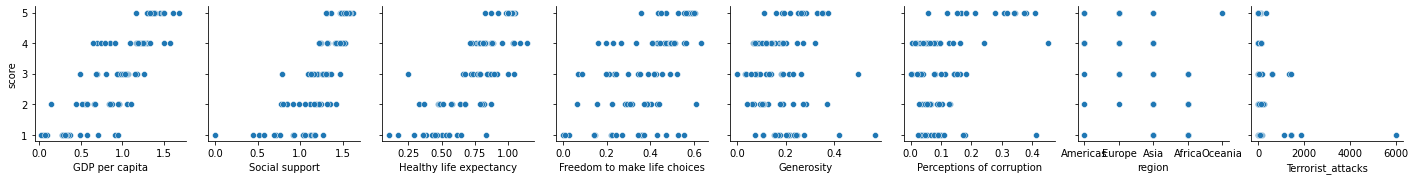

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

pp = sns.pairplot(data=df,
                  y_vars=['score'],
                  x_vars=['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
                  'Perceptions of corruption', 'region', 'Terrorist_attacks'])

We have plotted the dependent variable "Score" on the y-axis and different independent variables on the x-axis to visualize their relationships to one another. Upon looking at these graphs we see that "GDP per capita", "Social Support", and "Healthy Life Expectancy" appear to have a clear positive correlation with the dependent variable. The same could be argued for "Freedom to Make Life Choices", which appears to have a weak positive correlation with Score but the relationship appears to be less obvious than the first three mentioned. Also "Terrorist Attacks" appears to have a negative correlation with "Score" - the higher the Terrorist Attack number the lower the happiness score, but much like the previous variable, this relationship does not appear strong. The other variables do not appear to show a discernable relationship if we are to judge only by the scatterplots.

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
prep_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=prep_transformer.fit(X_train) 

In [10]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [11]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

## Feature Selection with Lasso

Now let's examine the features of X_train which might play an important role using LassoCV from sklearn

In [75]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV

#Generating list of column names for indetifying non-zero features from output array
cols = (X_train.drop(['Country or region', 'name'], axis=1)).columns.tolist()
r_dummies = pd.get_dummies(X_train["region"]).columns.tolist()
sr_dummies = pd.get_dummies(X_train["sub-region"]).columns.tolist()
i = cols.index('region')
j = cols.index('sub-region')
cols[i:i+1] = r_dummies
cols[j:j+1] = sr_dummies

lcv = LassoCV()
lcv.fit(preprocessor(X_train), df["score"])
print("Best alpha from LassoCV: %f" % lcv.alpha_)
coef = pd.Series(lcv.coef_, index = cols)
importance = np.abs(coef)
#Return an array of features which are non-zero
np.array(cols)[importance > 0]

Best alpha from LassoCV: 0.010779


array(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'Africa',
       'Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Northern America', 'Western Europe', 'Asia', 'Europe'],
      dtype='<U31')

After running LassoCV we see that the following features remain 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Africa', 'Australia and New Zealand', 'Central Asia', 'Eastern Asia', 'Northern America', 'Western Europe', 'Asia', & 'Europe'.

In [76]:
#array of features which were dropped after LassoCV
np.array(cols)[importance == 0]

array(['Perceptions of corruption', 'Eastern Europe',
       'Latin America and the Caribbean', 'Northern Africa',
       'Northern Europe', 'South-eastern Asia', 'Southern Asia',
       'Southern Europe', 'Sub-Saharan Africa', 'Western Asia', 'Oceania',
       'sub-region', 'Terrorist_attacks'], dtype='<U31')

Therefore, the following features are set to zero by LassoCV: 'Perceptions of corruption', 'Eastern Europe', 'Latin America and the Caribbean', 'Northern Africa', 'Northern Europe', 'South-eastern Asia', 'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa', 'Western Asia', 'Oceania', & 'Terrorist_attacks'

##3. Fit model on preprocessed data and save preprocessor function and model 


In [107]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=5)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9545454545454546

In [18]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save preprocessor function to local "preprocessor.zip" file

#### Save model to local ".onnx" file

In [19]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [20]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [22]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [23]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): Random Forest model
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 566

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [24]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

##5. Model 2


In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8295454545454546

In [31]:
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save preprocessor function to local "preprocessor.zip" file

#### Save model to local ".onnx" file

In [32]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## Generate predictions from X_test data and submit model to competition


In [33]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [34]:
#Instantiate Competition
mycompetition= ai.Competition(apiurl)

In [35]:
#Submit Model 2: 

#-- Generate predicted values (Model 2)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): KNN Classifier
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 571

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


##6. Model 3

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

1.0

In [57]:
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save preprocessor function to local "preprocessor.zip" file

#### Save model to local ".onnx" file

In [58]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [59]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [60]:
#Instantiate Competition
mycompetition= ai.Competition(apiurl)

In [61]:
#Submit Model 3: 

#-- Generate predicted values (Model 3)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 3 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): Gradient Boosted Model
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 584

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Improving models following team discussion

After discussion it appears Gradient Boosted Models are doing well, so I am going to attempt to improve upon my previous Gradient Boosted model by changing some parameters. First I am going to drop two categories that LassoCV eliminated when doing feature extraction 'Perceptions of Corruption and 'Terrorist Attacks'. Second I am going to use GridSearchCV to find the best parameters for this model.

In [92]:
#Altering the pipeline to remove 'Perceptions of corruption' and 'Terrorist attacks' which were eliminated when using
#LassoCV for feature extraction

new_numeric_features = X_train.drop(['Perceptions of corruption', 'Terrorist_attacks','Country or region', 'name', 'region', 'sub-region'], axis=1)
new_numeric_features=new_numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
prep_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, new_numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=prep_transformer.fit(X_train) 

In [93]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [106]:
#tuning hyperparameters with GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth":[3,10],
    "n_estimators":[3,6,10]
    }

gbcv = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)

gbcv.fit(preprocessor(X_train), df["score"])
print(gbcv.score(preprocessor(X_train), df["score"]))
print(gbcv.best_params_)

0.9090909090909091
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 6}


In [108]:
#training and fitting a GradientBoostingClassifier with the default hyperparameters after using the new Pipeline that excludes
#the features that were dropped
model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 6)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9090909090909091

In [109]:
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [110]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [111]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [112]:
#Instantiate Competition
mycompetition= ai.Competition(apiurl)

In [113]:
#Submit Enhanced Gradient Boosted Model: 

#-- Generate predicted values (Model 3)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Enhanced Gradient Boosted Model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 861

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


After dropping 'Perceptions of Corruption' and 'Terrorist Attacks' and using GridSearchCV, my Gradient Boosting Classifier model accuracy improved from .4705 to .5. This improvement is quite substantial judging by the competition leaderbord.